### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
cols = data.columns
for c in cols:
  print(f"{c}: Unique values: {data[c].unique()}")

destination: Unique values: ['No Urgent Place' 'Home' 'Work']
passanger: Unique values: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: Unique values: ['Sunny' 'Rainy' 'Snowy']
temperature: Unique values: [55 80 30]
time: Unique values: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon: Unique values: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: Unique values: ['1d' '2h']
gender: Unique values: ['Female' 'Male']
age: Unique values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus: Unique values: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children: Unique values: [1 0]
education: Unique values: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation: Unique values: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitio

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

4. Find missing values

In [8]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

car column is having missing entries for 12576 out of 12684 entries. This column can be dropped.
There are 74 duplicate entries. These can be dropped.

In [9]:
data = data.drop('car', axis=1)

In [10]:
duplicates = data[data.duplicated()]
duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 4192 to 8516
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           74 non-null     object
 1   passanger             74 non-null     object
 2   weather               74 non-null     object
 3   temperature           74 non-null     int64 
 4   time                  74 non-null     object
 5   coupon                74 non-null     object
 6   expiration            74 non-null     object
 7   gender                74 non-null     object
 8   age                   74 non-null     object
 9   maritalStatus         74 non-null     object
 10  has_children          74 non-null     int64 
 11  education             74 non-null     object
 12  occupation            74 non-null     object
 13  income                74 non-null     object
 14  Bar                   74 non-null     object
 15  CoffeeHouse           74 non-null     obje

In [11]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12503 non-null  object
 15  CoffeeHouse           12393 non-null  obj

Drop nan rows.

In [12]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

4. What proportion of the total observations chose to accept the coupon?




In [150]:
total_coupons = data['Y'].value_counts()
accepted_percent = round((total_coupons[1]/data.shape[0])*100, 2)
rejected_percent = round((total_coupons[0]/data.shape[0])*100, 2)
print(f'Percentage of coupons accepted: {accepted_percent}')
print(f'Percentage of coupons rejected: {rejected_percent}')

Percentage of coupons accepted: 56.84
Percentage of coupons rejected: 43.16


5. Use a bar plot to visualize the `coupon` column.

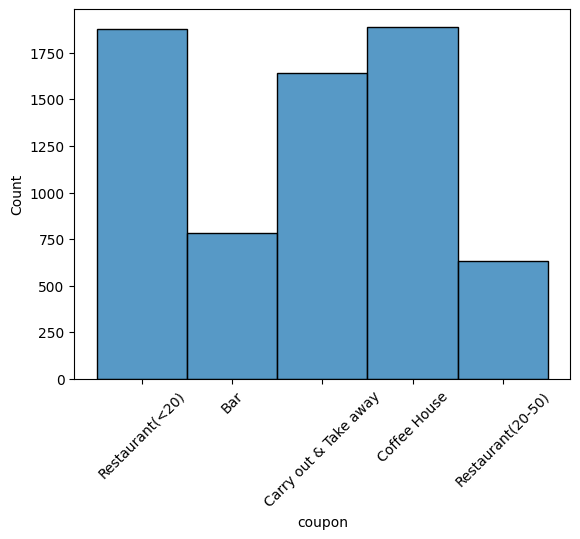

In [151]:
ax = sns.histplot(data=data.loc[data['Y']==1], x="coupon")
ax.tick_params(axis='x', labelrotation=45)

6. Use a histogram to visualize the temperature column.

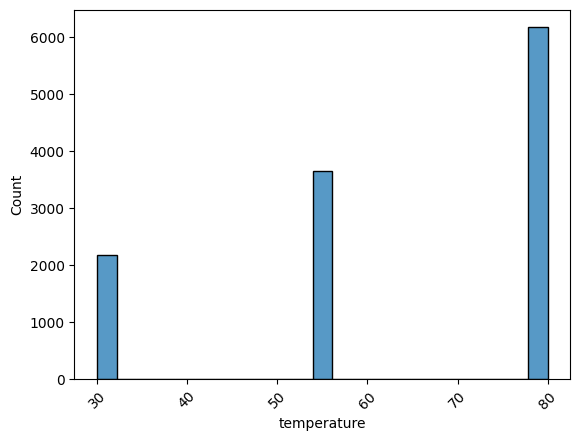

In [153]:
ax = sns.histplot(data=data, x="temperature")
ax.tick_params(axis='x', labelrotation=45)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [136]:
bar_coupons_data = data.query('coupon == "Bar"')
bar_coupons_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [138]:
bar_coupons_accepted = bar_coupons_data.query('Y == 1').value_counts().shape[0]
bar_coupons_percent = round((bar_coupons_accepted/bar_coupons_data.shape[0])*100, 2)
print(f'Percentage of Bar coupons accepted: {bar_coupons_percent}')

Total Bar coupons accepted: 785
Percentage of Bar coupons accepted: 41.19


Percentage of Bar coupons accepted: 41.19

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [139]:
lt_eq_3 = bar_coupons_data.query(' (Y==1) and (Bar in ["never", "less1", "1~3"]) ').shape[0]
gt_3 = bar_coupons_data.query(' (Y==1) and (Bar in ["gt8", "4~8"]) ').shape[0]
print(f'Percentage of Bar coupons accepted: {bar_coupons_percent}')
print(f'Percentage of <= 3 Bar coupons used: {round((lt_eq_3/bar_coupons_accepted)*100, 2)}')
print(f'Percentage of > 3 Bar coupons used: {round((gt_3/bar_coupons_accepted)*100, 2)}')

Percentage of Bar coupons accepted: 41.19
Percentage of <= 3 Bar coupons used: 81.27
Percentage of > 3 Bar coupons used: 18.73


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [142]:
bar_driver_25over = bar_coupons_data.query('(Y==1) and (age not in ["21", "below21"]) and (Bar in ["1~3", "gt8", "4~8"])').shape[0]
bar_drivers_rest = bar_coupons_accepted - bar_driver_25over
print(f'Percentage drivers who go to a bar more than once a month and are over the age of 25: {round((bar_driver_25over/bar_coupons_accepted)*100, 2)}')
print(f'Percentage for rest of the drivers: {round((bar_drivers_rest/bar_coupons_accepted)*100, 2)}')

Percentage drivers who go to a bar more than once a month and are over the age of 25: 35.41
Percentage for rest of the drivers: 64.59


Percentage drivers who go to a bar more than once a month and are over the age of 25: 35.41

Percentage for rest of the drivers: 64.59

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [143]:
driver_question_5 = bar_coupons_data.query('(Y==1) and (passanger not in ["Kid\(s\)", "Alone"]) and (Bar in ["1~3", "gt8", "4~8"]) \
and (occupation not in ["Farming Fishing & Forestry"])').shape[0]
bar_drivers_rest = bar_coupons_accepted - driver_question_5

print(f'Acceptance rate between drivers who go to bars more than once a month and \
had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {round((driver_question_5/bar_coupons_accepted)*100, 2)}')
print(f'Percentage for rest of the drivers:  {round((bar_drivers_rest/bar_coupons_accepted)*100, 2)}')




Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 19.24
Percentage for rest of the drivers:  80.76


Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 19.24

Percentage for rest of the drivers:  80.76

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [145]:
total_drivers = data.query('Y == 1').shape[0]

gt_month_nokid_notwindowed = data.query('(Y == 1) and (passanger not in ["Kid\(s\)", "Alone"] ) \
                                           and (Bar in ["1~3", "gt8", "4~8"]) and (maritalStatus not in ["Widowed"])').shape[0]
gt_month_under_30 = data.query('(Y == 1) and (Bar in ["1~3", "gt8", "4~8"]) and (age in ["21", "26"])').shape[0]
cheap_rest_gt4_income_lt_50k = data.query('(Y == 1) and ( RestaurantLessThan20 in ["4~8", "gt8"]) and (income in ["$12500 - $24999", "$25000 - $37499", "$37500 - $49999"])').shape[0]

print(f'Percentage of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {round((gt_month_nokid_notwindowed/total_drivers)*100, 2)}')
print(f'Percentage of drivers who go to bars more than once a month and are under the age of 30: {round((gt_month_under_30/total_drivers)*100, 2)}')
print(f'Percentage of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {round((cheap_rest_gt4_income_lt_50k/total_drivers)*100, 2)}')


Percentage of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 15.47
Percentage of drivers who go to bars more than once a month and are under the age of 30: 19.33
Percentage of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 15.24


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Percentage of Bar coupons accepted: 41.19. Bar coupons are used less frequently. The percentage of <= 3 Bar coupons used: 81.27
Most of the drivers who accepted Bar coupon are in the age range 21-26.

Percentage of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 15.47
The time the coupon is used is around 6pm-10pm which looks like is used by people who are in service sector, other than occupations other than farming, fishing, or forestry.
Percentage of drivers who go to bars more than once a month and are under the age of 30: 19.33
Most of the coupons are used when the weather is Sunny and the Bar is located within 5-15 min distance.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Coffee house and restaurants < 20 are the highest number of coupons accepted.


Lets analyze the demographics and the weather for this data. Passengers travelling alone and with friends seems to accept the most of the most of the coupons.

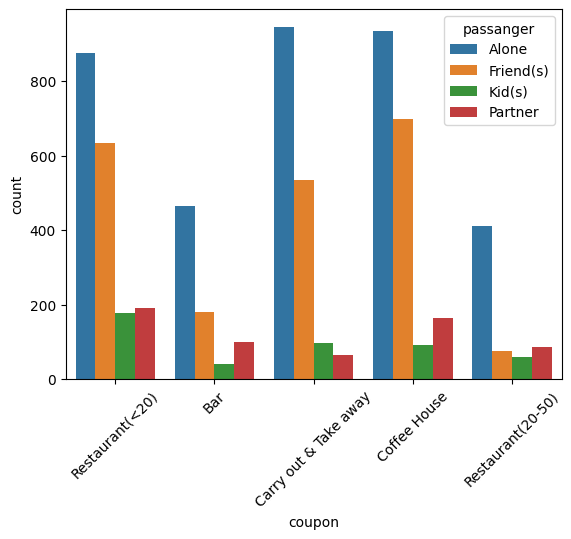

In [38]:
coupons_accepted = data.loc[data['Y']==1]
ax = sns.countplot(data=coupons_accepted, x='coupon', hue='passanger')
ax.tick_params(axis='x', labelrotation=45)


Lets analyze the weather for the accepted coupons.

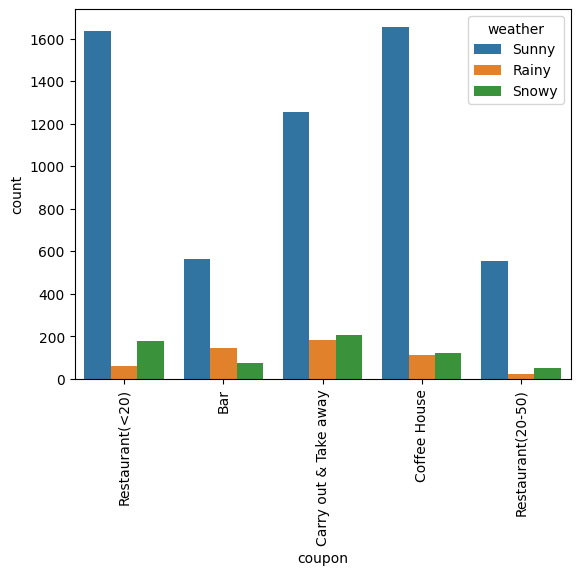

In [83]:
ax = sns.countplot(data=coupons_accepted, x='coupon', hue='weather')
ax.tick_params(axis='x', labelrotation=90)


Majority of the coupons are accepted for coffee house, Restaurants(<20) and carry out take aways. More than 80% coupons are accepted on a Sunny Day. Lets look of the percentage of acceptances.

In [64]:
coupons_accepted_count = coupons_accepted.shape[0]
coupons_accepted_percent = round((coupons_accepted_count/data.shape[0])*100, 2)
accepted_sunny_percent = round((coupons_accepted.loc[coupons_accepted['weather']=='Sunny'].shape[0]/coupons_accepted_count)*100, 2)
restaurant_lt_20 = round((coupons_accepted.loc[coupons_accepted['coupon']=='Restaurant(<20)'].shape[0]/coupons_accepted_count)*100, 2)
bar = round((coupons_accepted.loc[coupons_accepted['coupon']=='Bar'].shape[0]/coupons_accepted_count)*100, 2)
carry_out_take_away = round((coupons_accepted.loc[coupons_accepted['coupon']=='Carry out & Take away'].shape[0]/coupons_accepted_count)*100, 2)
coffee_house = round((coupons_accepted.loc[coupons_accepted['coupon']=='Coffee House'].shape[0]/coupons_accepted_count)*100, 2)
restaurant_20_50 = round((coupons_accepted.loc[coupons_accepted['coupon']=='Restaurant(20-50)'].shape[0]/coupons_accepted_count)*100, 2)
print(f'Percentage of total coupons accepted: {coupons_accepted_percent}')
print(f'Percentage of total coupons accepted on a Sunny Day: {accepted_sunny_percent}')
print(f'Percentage of total coupons accepted for Restaurants<20: {restaurant_lt_20}')
print(f'Percentage of total coupons accepted for Bars: {bar}')
print(f'Percentage of total coupons accepted for Carry out take away: {carry_out_take_away}')
print(f'Percentage of total coupons accepted for Coffee house: {coffee_house}')
print(f'Percentage of total coupons accepted for Restaurants 20-50: {restaurant_20_50}')

Percentage of total coupons accepted: 56.84
Percentage of total coupons accepted on a Sunny Day: 83.02
Percentage of total coupons accepted for Restaurants<20: 27.52
Percentage of total coupons accepted for Bars: 11.5
Percentage of total coupons accepted for Carry out take away: 24.07
Percentage of total coupons accepted for Coffee house: 27.66
Percentage of total coupons accepted for Restaurants 20-50: 9.25


Lets look at the destination and the distance data.

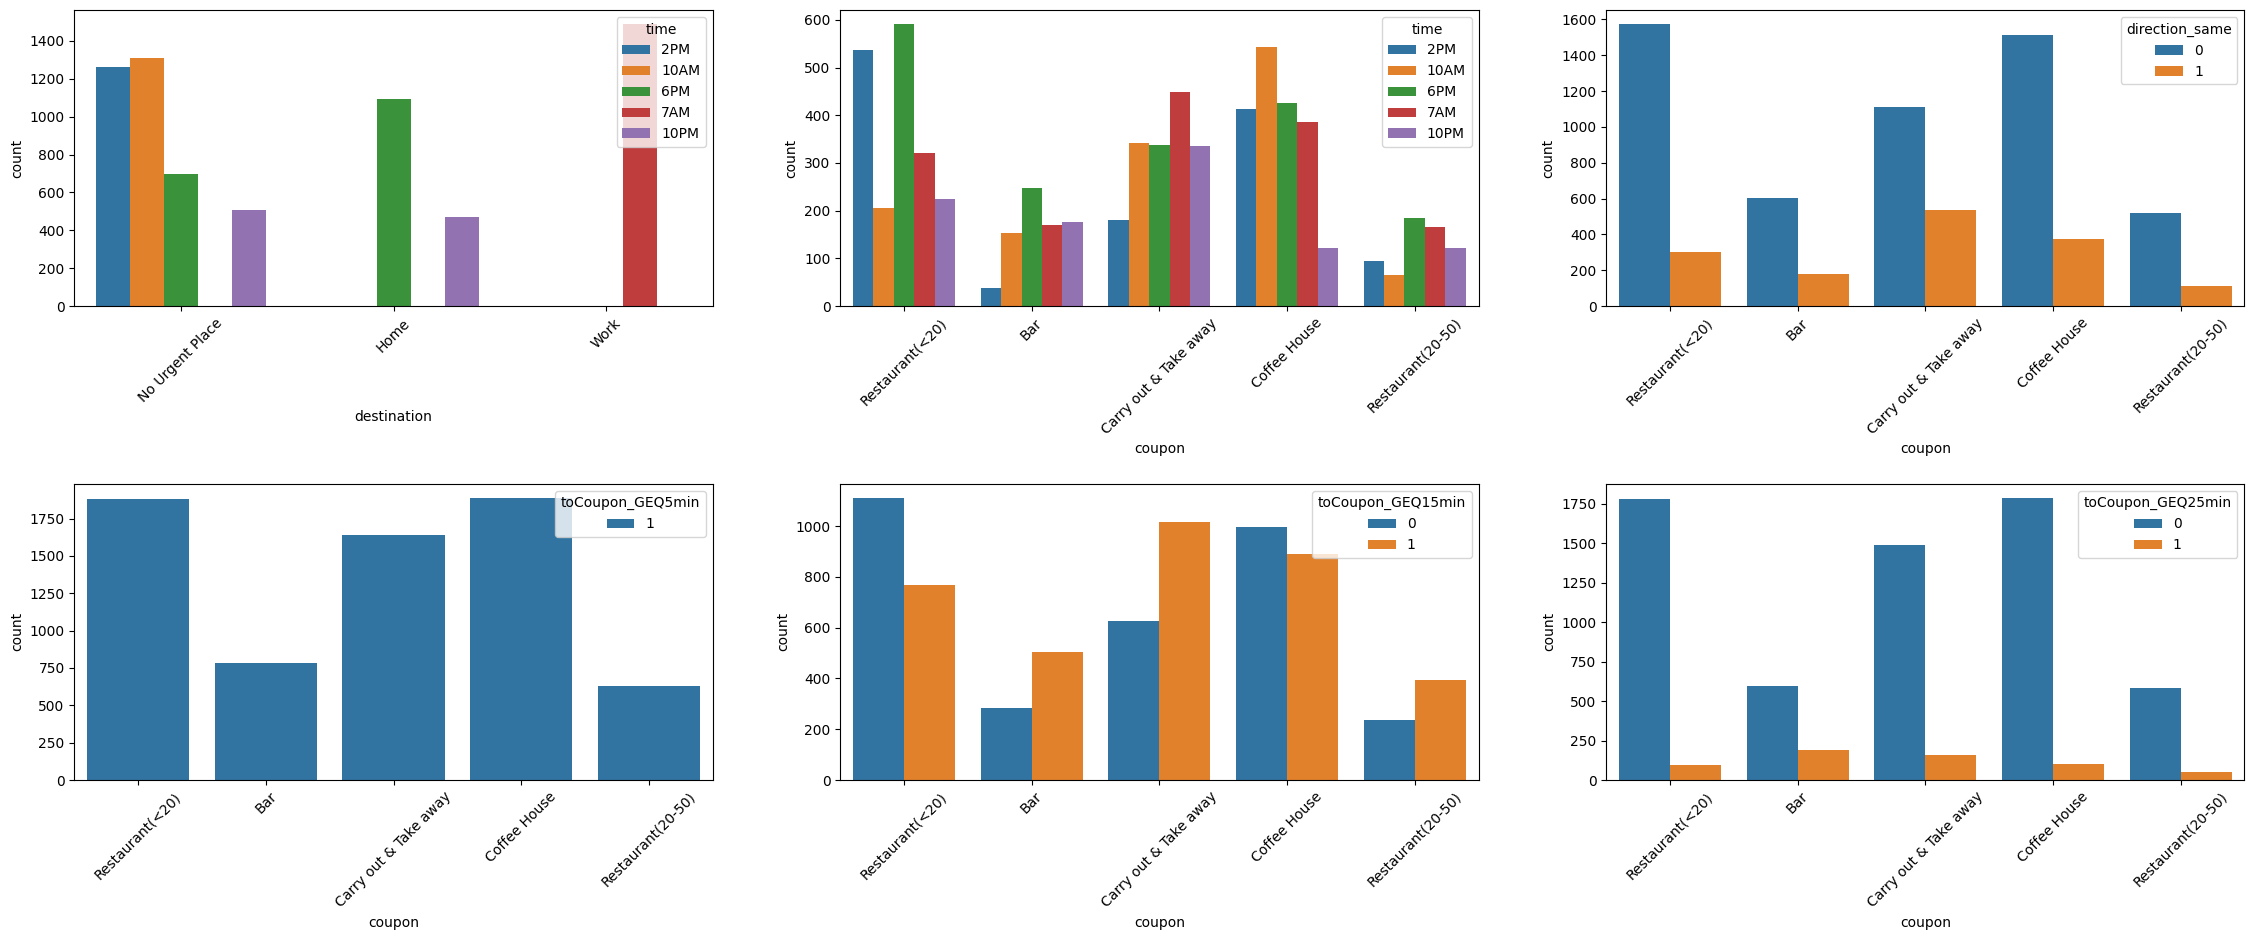

In [95]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(28,10))
plt.subplots_adjust(hspace = 0.6)
sns.countplot(data=coupons_accepted, x='destination', hue='time', ax = axs[0][0])
axs[0][0].tick_params(axis='x', labelrotation=45)
sns.countplot(data=coupons_accepted, x='coupon', hue='time', ax = axs[0][1])
axs[0][1].tick_params(axis='x', labelrotation=45)
sns.countplot(data=coupons_accepted, x='coupon', hue='direction_same', ax = axs[0][2])
axs[0][2].tick_params(axis='x', labelrotation=45)

sns.countplot(data=coupons_accepted, x='coupon', hue='toCoupon_GEQ5min', ax = axs[1][0])
axs[1][0].tick_params(axis='x', labelrotation=45)
sns.countplot(data=coupons_accepted, x='coupon', hue='toCoupon_GEQ15min', ax = axs[1][1])
axs[1][1].tick_params(axis='x', labelrotation=45)
sns.countplot(data=coupons_accepted, x='coupon', hue='toCoupon_GEQ25min', ax = axs[1][2])
axs[1][2].tick_params(axis='x', labelrotation=45)

Analyzing the plots above, most of the 7AM coupons are accepted are for Coffee House with destination Work and the restaurant/Bar coupons are accepted at 6PM majority with destination Home. The direction is not influcencing the coupon acceptance. But the distance is the important factor here with most of the coupons accepted are within the distance of 5-15 mins.

Proprotion of coupons accepted against Age, Marital Status, Education, Income and Occupation

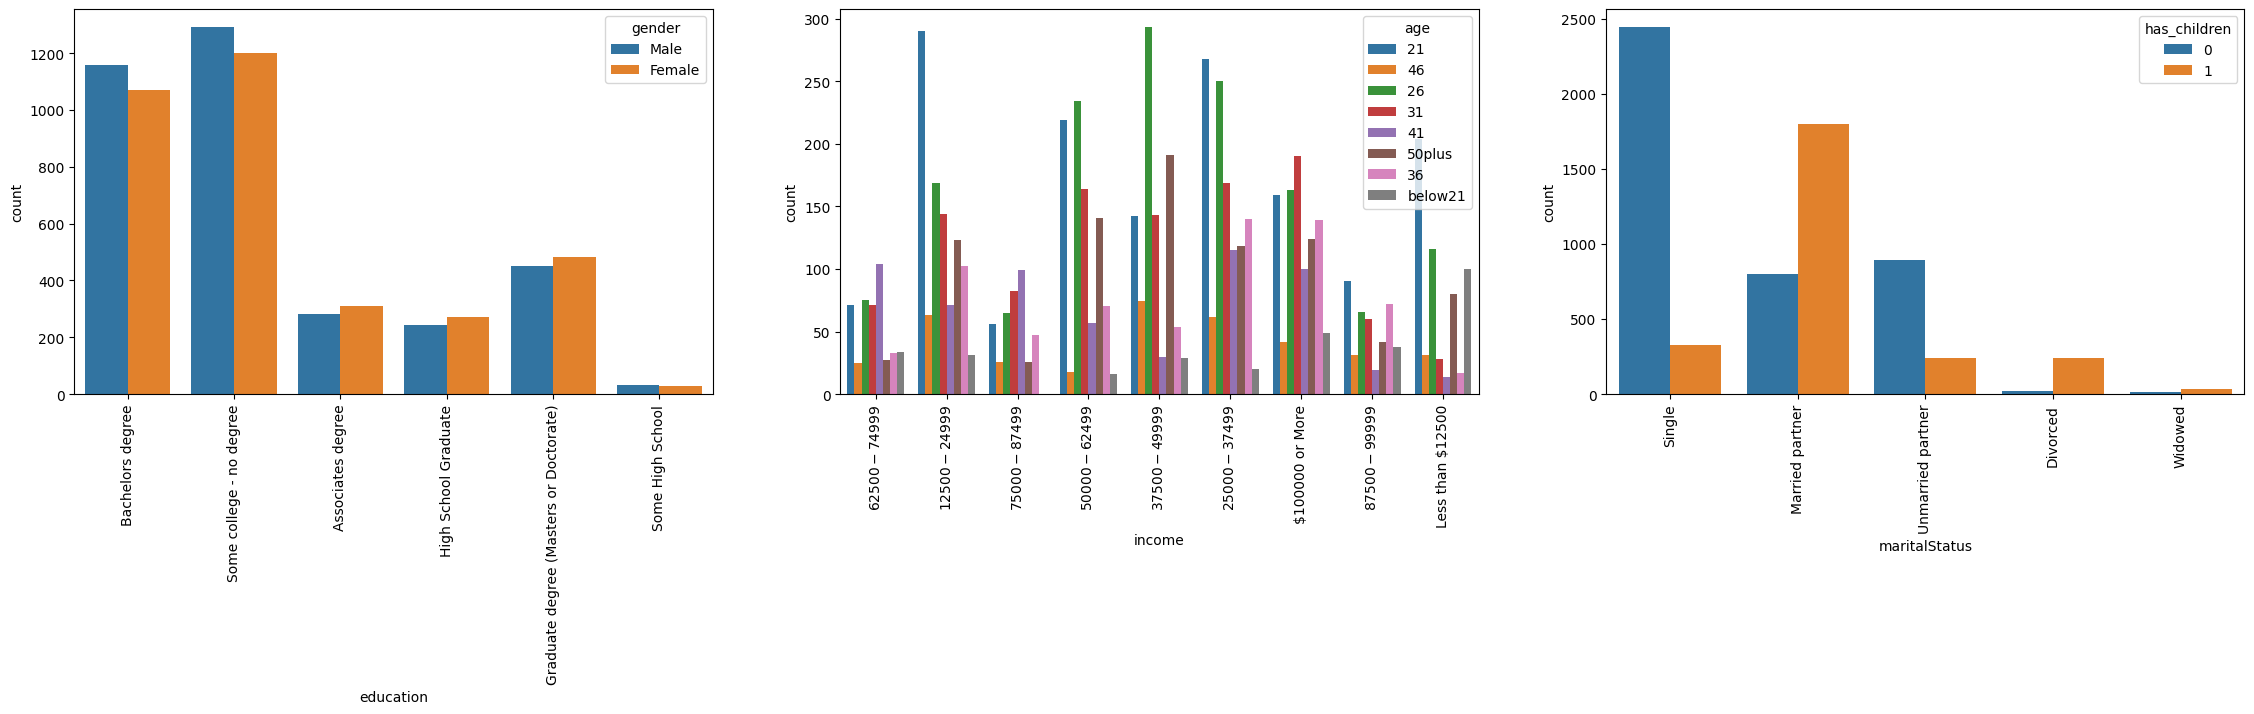

In [118]:
# Proportion of Y against age, gender, education, occupation and marital status
fig, axs = plt.subplots(ncols=3, figsize=(28,5))
customer_info = coupons_accepted[['Y', 'age', 'gender','education', 'occupation', 'maritalStatus', 'income', 'has_children']]
sns.countplot(x = 'education', hue='gender', data = customer_info, ax= axs[0])
axs[0].tick_params(axis='x', labelrotation=90)
sns.countplot(x = 'income',  hue='age', data = customer_info, ax= axs[1])
axs[1].tick_params(axis='x', labelrotation=90)
sns.countplot(x = 'maritalStatus',  hue='has_children', data = customer_info, ax= axs[2])
axs[2].tick_params(axis='x', labelrotation=90)

In [127]:
education_percent = round((coupons_accepted.query('education in ("Bachelors degree", "Some college - no degree")').shape[0]/coupons_accepted_count)*100, 2)
age_percent = round((coupons_accepted.query('age in ("21", "26", "31")').shape[0]/coupons_accepted_count)*100, 2)
income_percent = round((coupons_accepted.query('income in ("$12500 - $24999", "$25000 - $37499", "$37500 - $49999", "$50000 - $62499")').shape[0]/coupons_accepted_count)*100, 2)
marital_status_percent = round((coupons_accepted.query('maritalStatus in ("Single", "Married Partner")').shape[0]/coupons_accepted_count)*100, 2)
print(f'Percentage of total coupons accepted with Bachelors degree or some college-no degree: {education_percent}')
print(f'Percentage of total coupons accepted with Age group 21-31: {age_percent}')
print(f'Percentage of total coupons accepted with income range 12K - 63K: {income_percent}')
print(f'Percentage of total coupons accepted with Marital status Single and Married: {marit}')

Percentage of total coupons accepted with Bachelors degree or some college-no degree: 69.16
Percentage of total coupons accepted with Age group 21-31: 58.33
Percentage of total coupons accepted with income range 12K - 63K: 58.75
Percentage of total coupons accepted with Marital status Single and Married: 40.63
